# **Import Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D


# **Import Dataset**

In [5]:
data=pd.read_csv('/content/hour.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/hour.csv'

In [4]:
print(tf.config.experimental.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Header of Dataset**

In [276]:
data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Information About Dataset**

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# **Data Preprocessing**


1.   Remove Duplicate
2.   Remove Outliers
3.   Drop dteday column
4.   Rename the columns



# **1. Remove Duplicate**

In [278]:
data.drop_duplicates()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# **2. Remove Outliers**

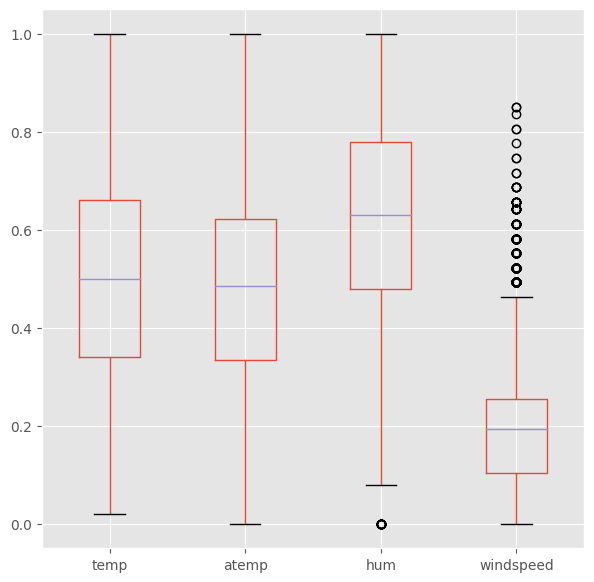

In [279]:
data.boxplot(column=['temp','atemp','hum','windspeed'])
plt.show()

**Since only hum and windspeed contain outliers, hence...**

In [280]:
for x in ['hum']:
     q3,q1 = np.percentile(data.loc[:,x],[75,25])
     iqr =(q3-q1)
     upper = q3 + (1.5*iqr)
     lower = q1 - (1.5*iqr)
     data.loc[data[x]<lower,x] = np.nan
     data.loc[data[x]>upper,x] = np.nan

for x in ['windspeed']:
     q3,q1 = np.percentile(data.loc[:,x],[75,25])
     iqr =(q3-q1)
     upper = q3 + (1.5*iqr)
     lower = q1 - (1.5*iqr)
     data.loc[data[x]<lower,x] = np.nan
     data.loc[data[x]>upper,x] = np.nan

data['hum'].fillna((data['hum'].mean()), inplace=True),
data['windspeed'].fillna((data['windspeed'].mean()), inplace=True),

#To know the number of missing values in the dataset.
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# **3. Drop dteday columns**

In [281]:
data.drop(['dteday'], axis=1, inplace = True)

# **4. Rename the columns**

In [282]:
data.rename(columns = {
    'dteday' : 'day',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'temp' : 'temperature',
    'weathersit':'weather_situation',
    'atemp': 'adjusted_temperature',
    'hum' : 'humidity',
    'cnt' : 'total_riders'
}, inplace = True)

# **Columns after data processing**

In [283]:
data.head()

,instant,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,adjusted_temperature,humidity,windspeed,casual,registered,total_riders
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Description of Dataset**

In [284]:
data.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,adjusted_temperature,humidity,windspeed,casual,registered,total_riders
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628024,0.182893,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.110888,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.182893,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000


# **Data Visualization**

<Axes: >

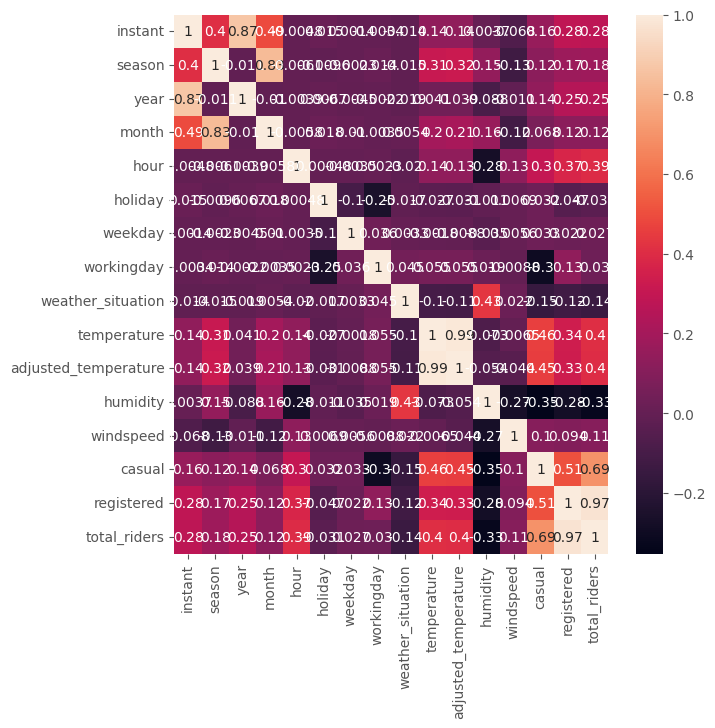

In [285]:
sns.heatmap(data.corr(), annot=True)

From the correlation heatmap above, we can conclude that hour, temperature and adjusted_temperature more are highly correlated with total_riders.

**(except the casual and registered from the correlation heatmap as total_riders = casual + registered)**

#**Split the data into training and testing sets** 




In [286]:
X = data[["hour","temperature"]]
Y = data['total_riders']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **Fit the data into linear regression model**

In [287]:
reg = LinearRegression()
model=reg.fit(X_train, Y_train)

# **Slope and the intercept**

In [288]:
slope = reg.coef_
intercept = reg.intercept_
print("Slope:" ,slope)
print("Intercept: %.2f" % intercept)

Slope: [  8.9851346  335.18576013]
Intercept: -79.74


# **Evaluation for the model**


**First testing: Hour & Temperature**

R2: 0.2920473427873629

Adjusted R2: 0.13472453007344354



In [289]:
Y_pred = reg.predict(X_test)
k = X.shape[1]
n = 12

MAE = mean_absolute_error(Y_test, reg.predict(X_test))
MSQ = mean_squared_error(Y_test, reg.predict(X_test))
RMSQ = mean_squared_error(Y_test, reg.predict(X_test), squared=False)
r2 = r2_score(Y_test, reg.predict(X_test))
adjr2 = 1-(((1-r2)*(n-1))/(n-k-1))

print("Mean absolute error: " + str(MAE))
print("Mean squared error: " + str(MSQ))
print("Root Mean squared error: " + str(RMSQ))
print("R2: " + str(r2))
print("Adjusted R2: " + str(adjr2))



Mean absolute error: 111.32389269632272
Mean squared error: 22364.81966376789
Root Mean squared error: 149.54872003386686
R2: 0.2920473427873629
Adjusted R2: 0.13472453007344354


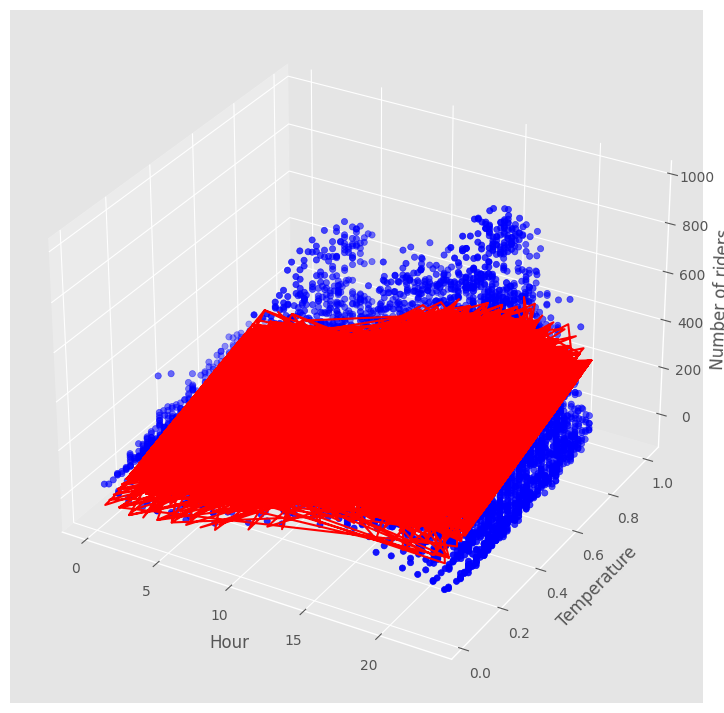

In [290]:
plt.figure(figsize=(9,9))
ax = plt.axes(projection ='3d')
x= X_train["hour"]
y= X_train["temperature"]
z= Y_train
ax.scatter(x,y,z,c='blue')
ax.set_xlabel("Hour")
ax.set_ylabel("Temperature")
ax.set_zlabel("Number of riders")
Z = intercept + (slope[0]*x)+(slope[1]*y)
ax.plot(x,y,Z,'red')

**Second testing: Adjusted Temperature & Humidity**

R2: 0.2565935545081839

Adjusted R2: 0.09139212217666914


In [291]:
X = data[["adjusted_temperature","humidity"]]
Y = data['total_riders']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

reg = LinearRegression()
model=reg.fit(X_train, Y_train)

slope = reg.coef_
intercept = reg.intercept_
print("Slope:" ,slope)
print("Intercept: %.2f" % intercept)

Y_pred = reg.predict(X_test)
k = X.shape[1]
n = 12

MAE = mean_absolute_error(Y_test, reg.predict(X_test))
MSQ = mean_squared_error(Y_test, reg.predict(X_test))
RMSQ = mean_squared_error(Y_test, reg.predict(X_test), squared=False)
r2 = r2_score(Y_test, reg.predict(X_test))
adjr2 = 1-(((1-r2)*(n-1))/(n-k-1))

print("Mean absolute error: " + str(MAE))
print("Mean squared error: " + str(MSQ))
print("Root Mean squared error: " + str(RMSQ))
print("R2: " + str(r2))
print("Adjusted R2: " + str(adjr2))

Slope: [ 403.2819021  -294.27144265]
Intercept: 183.85
Mean absolute error: 115.70745540196812
Mean squared error: 23484.834643841743
Root Mean squared error: 153.24762524698954
R2: 0.2565935545081839
Adjusted R2: 0.09139212217666914


**Third testing: Weather Situation & Windspeed**

R2: 0.029814289865812027

Adjusted R2: -0.18578253460845207




In [292]:
X = data[["weather_situation","windspeed"]]
Y = data['total_riders']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

reg = LinearRegression()
model=reg.fit(X_train, Y_train)

slope = reg.coef_
intercept = reg.intercept_
print("Slope:" ,slope)
print("Intercept: %.2f" % intercept)

Y_pred = reg.predict(X_test)
k = X.shape[1]
n = 12

MAE = mean_absolute_error(Y_test, reg.predict(X_test))
MSQ = mean_squared_error(Y_test, reg.predict(X_test))
RMSQ = mean_squared_error(Y_test, reg.predict(X_test), squared=False)
r2 = r2_score(Y_test, reg.predict(X_test))
adjr2 = 1-(((1-r2)*(n-1))/(n-k-1))

print("Mean absolute error: " + str(MAE))
print("Mean squared error: " + str(MSQ))
print("Root Mean squared error: " + str(RMSQ))
print("R2: " + str(r2))
print("Adjusted R2: " + str(adjr2))

Slope: [-42.32423128 176.67185198]
Intercept: 219.38
Mean absolute error: 138.18230928933713
Mean squared error: 30648.98228215646
Root Mean squared error: 175.06850739683725
R2: 0.029814289865812027
Adjusted R2: -0.18578253460845207


**Fourth testing: Humidity & Temperature**

R2: 0.25503548478162374

Adjusted R2: 0.08948781473309575

In [293]:
X = data[["humidity","temperature"]]
Y = data['total_riders']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

reg = LinearRegression()
model=reg.fit(X_train, Y_train)

slope = reg.coef_
intercept = reg.intercept_
print("Slope:" ,slope)
print("Intercept: %.2f" % intercept)

Y_pred = reg.predict(X_test)
k = X.shape[1]
n = 12

MAE = mean_absolute_error(Y_test, reg.predict(X_test))
MSQ = mean_squared_error(Y_test, reg.predict(X_test))
RMSQ = mean_squared_error(Y_test, reg.predict(X_test), squared=False)
r2 = r2_score(Y_test, reg.predict(X_test))
adjr2 = 1-(((1-r2)*(n-1))/(n-k-1))

print("Mean absolute error: " + str(MAE))
print("Mean squared error: " + str(MSQ))
print("Root Mean squared error: " + str(RMSQ))
print("R2: " + str(r2))
print("Adjusted R2: " + str(adjr2))

Slope: [-288.2863669  358.9135096]
Intercept: 193.62
Mean absolute error: 115.737460671355
Mean squared error: 23534.055376475604
Root Mean squared error: 153.4081333452552
R2: 0.25503548478162374
Adjusted R2: 0.08948781473309575


**Fifth testing : Adjusted Temperature & Hour**

R2: 0.28991220399936735

Adjusted R2: 0.13211491599922676



In [294]:
X = data[["adjusted_temperature","hour"]]
Y = data['total_riders']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

reg = LinearRegression()
model=reg.fit(X_train, Y_train)

slope = reg.coef_
intercept = reg.intercept_
print("Slope:" ,slope)
print("Intercept: %.2f" % intercept)

Y_pred = reg.predict(X_test)
k = X.shape[1]
n = 12

MAE = mean_absolute_error(Y_test, reg.predict(X_test))
MSQ = mean_squared_error(Y_test, reg.predict(X_test))
RMSQ = mean_squared_error(Y_test, reg.predict(X_test), squared=False)
r2 = r2_score(Y_test, reg.predict(X_test))
adjr2 = 1-(((1-r2)*(n-1))/(n-k-1))

print("Mean absolute error: " + str(MAE))
print("Mean squared error: " + str(MSQ))
print("Root Mean squared error: " + str(RMSQ))
print("R2: " + str(r2))
print("Adjusted R2: " + str(adjr2))

Slope: [372.75526447   9.02708594]
Intercept: -91.03
Mean absolute error: 111.6580843139294
Mean squared error: 22432.270493232452
Root Mean squared error: 149.77406482175894
R2: 0.28991220399936735
Adjusted R2: 0.13211491599922676


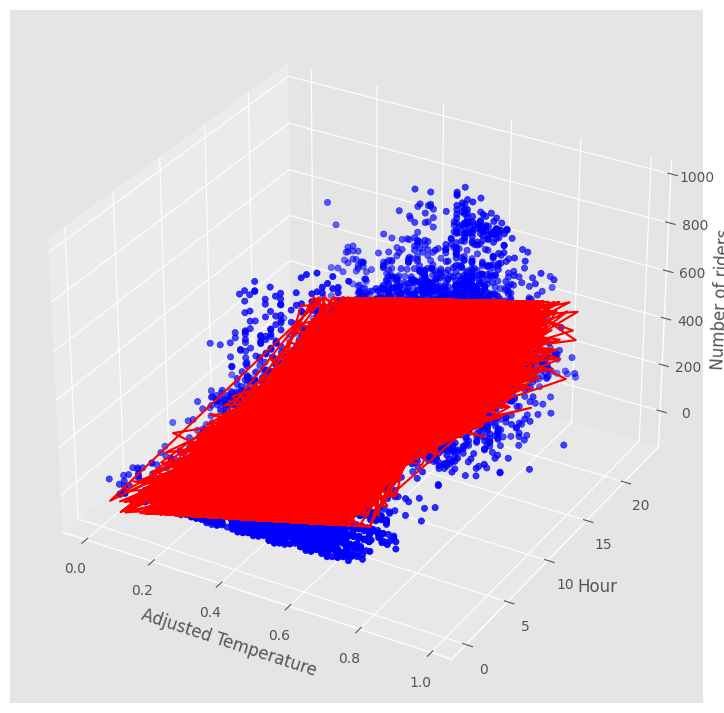

In [295]:
plt.figure(figsize=(9,9))
ax = plt.axes(projection ='3d')
x= X_train["adjusted_temperature"]
y= X_train["hour"]
z= Y_train
ax.scatter(x,y,z,c='blue')
ax.set_xlabel("Adjusted Temperature")
ax.set_ylabel("Hour")
ax.set_zlabel("Number of riders")
Z = intercept + (slope[0]*x)+(slope[1]*y)
ax.plot(x,y,Z,'red')